In [1]:
from matplotlib import pyplot as plt

import torch as np
from torchvision.utils import save_image

from models.CSA import CSA
from tools.toml import load_option
from plot import array2image

## 数据载入

In [2]:
from loader import loader

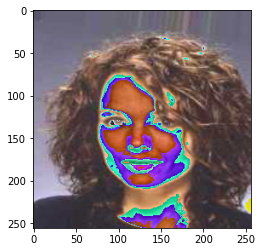

In [3]:
alpha = 1
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break

x = array2image(xs[0])
# 查看处理后的图片
plt.imshow(x);

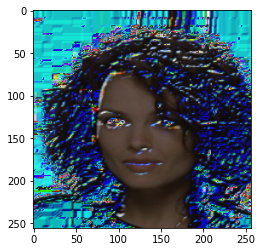

In [4]:
alpha = 0.2
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break

x = array2image(xs[0])
# 查看处理后的图片
plt.imshow(x);

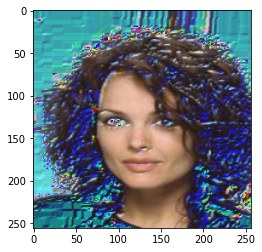

In [5]:
alpha = 0.5
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break

x = array2image(xs[0])
# 查看处理后的图片
plt.imshow(x);

## 模型载入

In [6]:
base_opt = load_option('options/base.toml')
opt = load_option('options/train.toml')
opt.update(base_opt)

model = CSA(**opt)

initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
---------- Networks initialized -------------
UnetGeneratorCSA(
  (model): UnetSkipConnectionBlock_3(
    (model): Sequential(
      (0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): UnetSkipConnectionBlock_3(
        (model): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace=True)
          (1): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), dilation=(2, 2))
          (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (3): LeakyReLU(negative_slope=0.2, inplace=True)
          (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (6): UnetSkipConnectionBlock_3(
            (model): Sequential(
              (0): LeakyReLU(negat

## 模型训练

In [7]:
import time
from random import randint


def mask_op(mask):
    mask = mask.cuda()
    mask = mask[0][0]
    mask = np.unsqueeze(mask, 0)
    mask = np.unsqueeze(mask, 1)
    mask = mask.byte()
    return mask

In [8]:
import torch
import torch.nn.functional as F
from torch import nn


class ReliefCNN(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.h_conv = nn.Conv2d(in_units, units, (1, 3), padding=(0, 1))
        self.v_conv = nn.Conv2d(units, units,
                                kernel_size=(3, 1), padding=(1, 0))
        self.s_conv = nn.Conv2d(units, units,
                                kernel_size=(3, 3), padding=(1, 1))

    def forward(self, X):
        x = self.h_conv(X)
        y = self.v_conv(X)
        z = torch.exp(x) + torch.exp(y) + self.v_conv(x) + self.h_conv(y)
        x = self.s_conv(x)
        return F.relu(x)

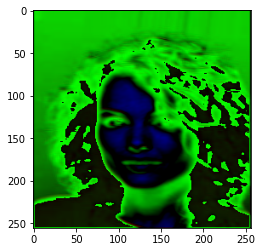

In [18]:
alpha = 1
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break
    
net = ReliefCNN(3, 3)
imgs = net(xs)[0]
x = array2image(imgs)
# 查看处理后的图片
plt.imshow(x);

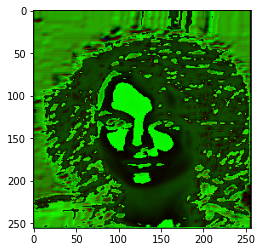

In [20]:
alpha = 0.2
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break
    
imgs = net(xs)[0]
x = array2image(imgs)
# 查看处理后的图片
plt.imshow(x);

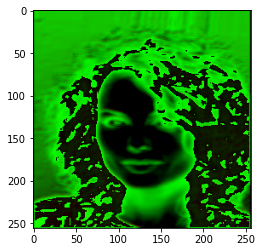

In [22]:
alpha = 0.8
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break
    
imgs = net(xs)[0]
x = array2image(imgs)
# 查看处理后的图片
plt.imshow(x);

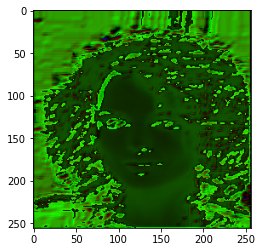

In [23]:
alpha = 0.1
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break
    
imgs = net(xs)[0]
x = array2image(imgs)
# 查看处理后的图片
plt.imshow(x);

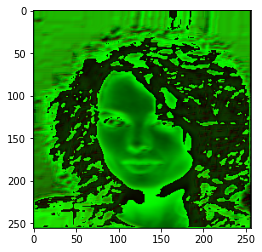

In [24]:
alpha = 0.5
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break
    
imgs = net(xs)[0]
x = array2image(imgs)
# 查看处理后的图片
plt.imshow(x);

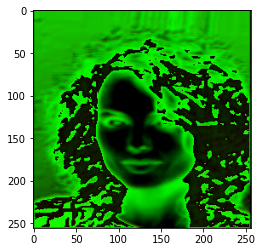

In [25]:
alpha = 0.75
trainset = loader.valset(alpha)

for xs, ys in trainset:
    break
    
imgs = net(xs)[0]
x = array2image(imgs)
# 查看处理后的图片
plt.imshow(x);